<a href="https://colab.research.google.com/github/yweslakarep123/diabetes_prediction/blob/main/diabates_risk_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d abdelazizsami/early-stage-diabetes-risk-prediction

Dataset URL: https://www.kaggle.com/datasets/abdelazizsami/early-stage-diabetes-risk-prediction
License(s): Apache 2.0
  0% 0.00/2.52k [00:00<?, ?B/s]
100% 2.52k/2.52k [00:00<00:00, 3.74MB/s]


In [ ]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.6/96.6 kB 2.8 MB/s eta 0:00:00


In [ ]:
from pyunpack import Archive
zip_file_path = '/content/early-stage-diabetes-risk-prediction.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
cat_col = df.select_dtypes(include=['object']).columns
for col in cat_col:
  df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


In [ ]:
x = df.drop(columns=['class'])
y = df['class']

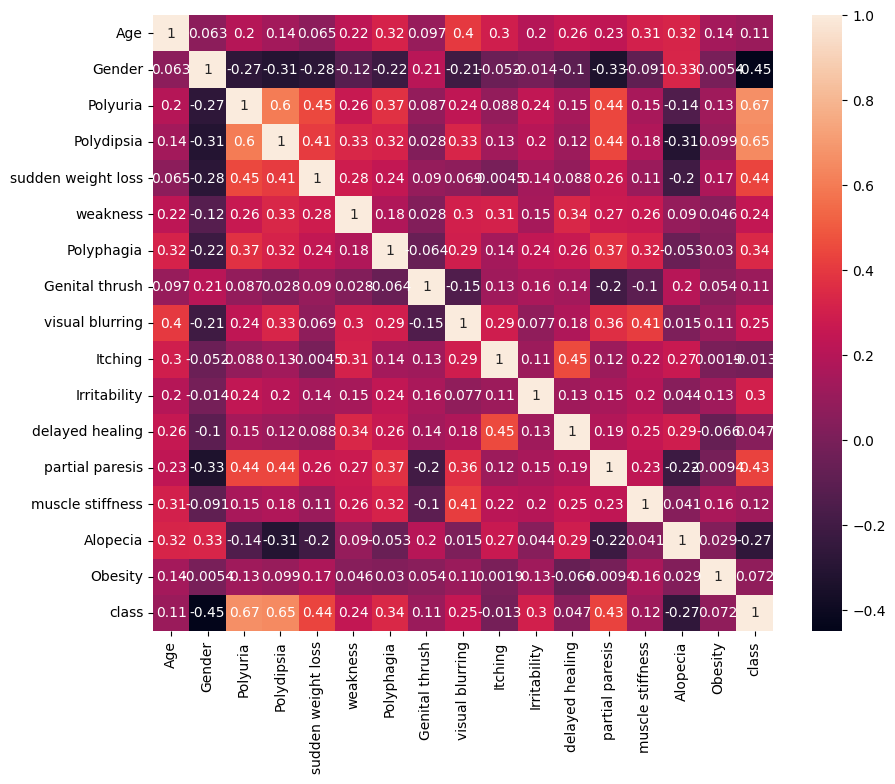

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pickle

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "XGBoost": XGBClassifier(),
    "Random Forest": RandomForestClassifier()
}

best_model = None
best_accuracy = 0

for name, model in models.items():
    print(name)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    r2 = r2_score(y_test, y_pred)
    print(f"R2 Score: {r2:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print()

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Save the best model to a .pkl file
if best_model is not None:
    with open('diabtes_prediction_model.pkl', 'wb') as file:
        pickle.dump(best_model, file)
    print(f"Best model (accuracy: {best_accuracy:.4f}) saved as 'diabtes_prediction_model.pkl'")
else:
    print("No model was saved as best model.")

Logistic Regression
Accuracy: 0.9359
R2 Score: 0.7168
Confusion Matrix:
[[49  5]
 [ 5 97]]
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        54
           1       0.95      0.95      0.95       102

    accuracy                           0.94       156
   macro avg       0.93      0.93      0.93       156
weighted avg       0.94      0.94      0.94       156


XGBoost
Accuracy: 0.9808
R2 Score: 0.9150
Confusion Matrix:
[[54  0]
 [ 3 99]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97        54
           1       1.00      0.97      0.99       102

    accuracy                           0.98       156
   macro avg       0.97      0.99      0.98       156
weighted avg       0.98      0.98      0.98       156


Random Forest
Accuracy: 0.9936
R2 Score: 0.9717
Confusion Matrix:
[[ 54   0]
 [  1 101]]
Classification Report:
              pr